In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_path =r'E:\work\masters\Trento\Academics\Semesters\Year 1 Semester 1\146069 Next Generation Networks\project\execution\data\Data\RTT_data.csv' 

In [3]:
RTT_data= pd.read_csv(dataset_path)
RTT_data.describe()

,%Timestamp[s],GroundTruthPositionX[m],GroundTruthPositionY[m],GroundTruthPositionZ[m],ML_range_estimate[m],AP_positionX[m],AP_positionY[m],AP_positionZ[m],AP_index,GroundTruthRange[m],ToD_factor[m]
count,29581.000000,29581.000000,29581.000000,29581.000000,2.958100e+04,29581.000000,29581.000000,29581.0,29581.000000,29581.000000,29581.000000
mean,1653.616670,-14.156781,12.260815,45.215243,-1.622458e+05,-16.417500,13.741818,46.2,6.083331,18.611145,2.429761
std,977.989708,13.157277,8.265705,0.299618,5.230396e+06,16.142791,8.422767,0.0,3.324584,10.761029,13.484498
min,84.756000,-42.039000,-3.488100,44.900000,-3.000000e+08,-43.306000,-3.062600,46.2,1.000000,0.726800,-73.135000
25%,680.790000,-23.028000,4.858700,44.900000,9.420500e+00,-33.636000,6.033200,46.2,3.000000,9.952300,-7.393100
50%,1959.900000,-11.558000,15.538000,45.500000,1.848000e+01,-18.073000,15.363000,46.2,6.000000,17.114000,1.860100
75%,2468.200000,-2.323900,19.513000,45.500000,2.972100e+01,-4.888200,21.946000,46.2,9.000000,24.940000,10.297000
max,3240.900000,5.457700,22.488000,45.500000,7.400400e+01,4.788700,22.145000,46.2,12.000000,53.035000,73.987000


In [4]:
# https://towardsdatascience.com/an-introduction-to-statistical-analysis-and-modelling-with-python-ef816b67f8ff
nrows = RTT_data.shape[0]
meand= 2.429761
sd =13.484498

RTT = RTT_data['ToD_factor[m]']
x_norm = np.random.normal(meand, sd, nrows)

In statistical analysis, one of the possible analyses that can be conducted is to verify that the data fits a specific distribution, in other words, that the data “matches” a specific theoretical model.
This kind of analysis is called distribution fitting and consists of finding an interpolating mathematical function that represents the observed phenomenon.
An example could be when you have a series of observations 𝑥1,𝑥2,𝑥𝑛… and you want to verify if those observations come from a specific population described by a density function 𝑓(𝑥,θ), where θ is a vector of parameters to estimate based on the available data.

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 6.000e+00, 9.000e+00, 1.200e+01, 1.700e+01, 3.700e+01,
        5.600e+01, 7.300e+01, 1.110e+02, 1.950e+02, 2.390e+02, 3.420e+02,
        4.390e+02, 6.140e+02, 8.200e+02, 1.016e+03, 1.153e+03, 1.399e+03,
        1.575e+03, 1.764e+03, 1.873e+03, 1.967e+03, 1.984e+03, 1.992e+03,
        1.909e+03, 1.739e+03, 1.586e+03, 1.403e+03, 1.188e+03, 1.015e+03,
        7.780e+02, 6.540e+02, 5.010e+02, 3.490e+02, 2.560e+02, 1.690e+02,
        1.320e+02, 8.700e+01, 5.400e+01, 3.100e+01, 1.500e+01, 7.000e+00,
        5.000e+00, 8.000e+00]),
 array([-63.22004564, -60.91763516, -58.61522468, -56.31281419,
        -54.01040371, -51.70799323, -49.40558274, -47.10317226,
        -44.80076178, -42.49835129, -40.19594081, -37.89353033,
        -35.59111984, -33.28870936, -30.98629888, -28.6838884 ,
        -26.38147791, -24.07906743, -21.77665695, -19.47424646,
        -17.17183598, -14.8694255 , -12.56701501, -10.26

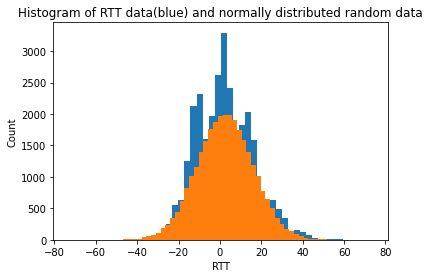

In [5]:
# Graphical exploration of the RTT data using histograms
nbins=50
plt.hist(RTT,bins=nbins)
plt.xlabel('RTT')
plt.ylabel('Count')
plt.title('Histogram of RTT data(blue) and normally distributed random data')
plt.hist(x_norm,bins=nbins)

Another way to display our data is to estimate the probability density function

Text(0.5, 1.0, 'Probability density functions of RTT (blue) and a random normal dist.')

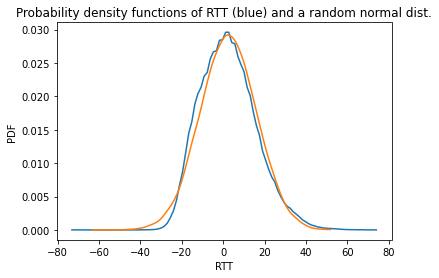

In [6]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

n_samples =int(0.25*nrows )

# estimate the probability density function (PDF)
kde = gaussian_kde(x_norm)

# estimate the probability density function (PDF)
kded = gaussian_kde(RTT)

# return evenly spaced numbers over a specified interval
dist_space = linspace(min(x_norm), max(x_norm), 100) # 100

# return evenly spaced numbers over a specified interval
dist_spaced = linspace(min(RTT), max(RTT), 100)

# plot the results
#plt.figure(figsize=(10,8))
#plt.subplot(1,2,1)
plt.plot(dist_spaced, kded(dist_spaced))
#plt.subplot(1,2,2)
plt.plot(dist_space, kde(dist_space))
plt.xlabel('RTT')
plt.ylabel('PDF')
plt.title('Probability density functions of RTT (blue) and a random normal dist.')

Just by observing those representations is it possible to formulate some ideas about the theoretical models that better fit our data. It is also possible to calculate the empirical distribution function:

Text(0, 0.5, 'Probabilities')

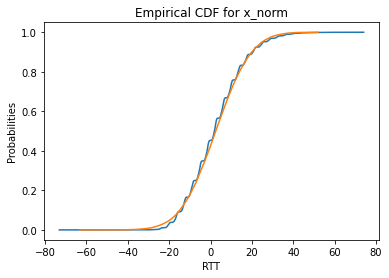

In [7]:
plt.plot(np.sort(RTT), np.linspace(0, 1, len(RTT)))
plt.title('Empirical CDF for data')
plt.plot(np.sort(x_norm), np.linspace(0, 1, len(x_norm)))
plt.title('Empirical CDF for x_norm')
plt.xlabel('RTT')
plt.ylabel('Probabilities')

Another graphical instrument that can come in help is the QQ plot, which shows on the y-axis the quantiles of the observed data VS the theoretical quantiles of the mathematical model.
With the term quantile, we identify the portion of observations that are below a specific value, the quantile. For example, the 0.75 quantile (or 75%) is the point where 75% of the data (sample) is below this value and 25 % is above.
When points on the plot tend to lay on the diagonal line, it means that the data(the sample) are fitting the Gaussian model in a “good” way.

Text(0.5, 1.0, 'QQ plot -RTT(left) and normal dist -right')

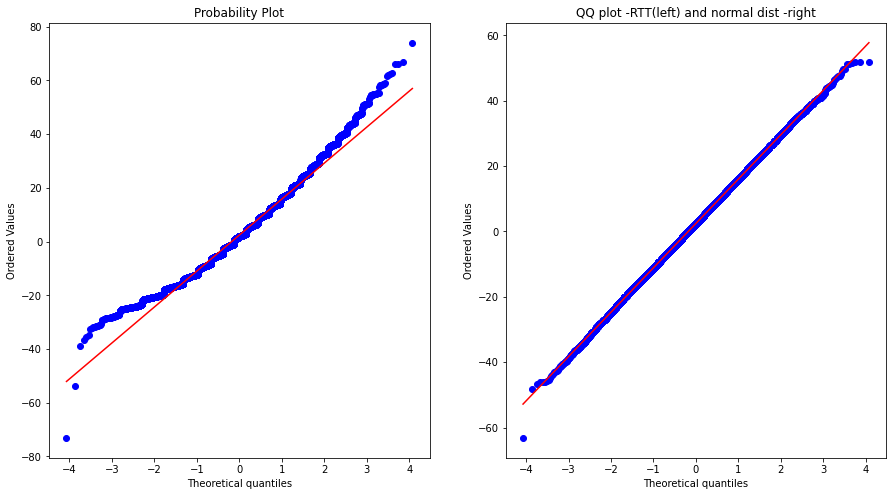

In [8]:
from scipy import stats
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(RTT, plot=plt)
plt.subplot(1,2,2)
stats.probplot(x_norm, plot=plt)
plt.title('QQ plot -RTT(left) and normal dist -right')


If we have another kind of observations, for example, a Weibull density function we can do the following:

Text(0, 0.5, 'Count')

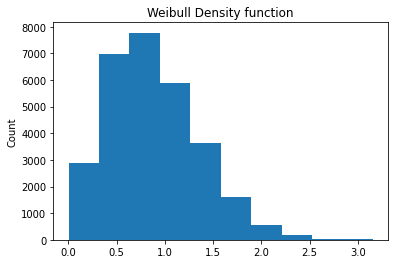

In [9]:
x_wei = np.random.weibull(2, nrows) # A Weibull sample of shape 2and size 500
plt.hist(x_wei)
plt.title('Weibull Density function')
plt.ylabel('Count')

Parameter estimation
Once the function that better represents the data is chosen, it is necessary to estimate the parameters that characterize this model based on the available data. Some of the most common methods include a method of moments estimators, least squares, and maximum likelihood estimators. In this introduction we will dig into the following methods:
the naive method
the method of moments
maximum-likelihood
The naive method is the most basic one and it is quite intuitive: it consists in estimating the parameters of the model by estimating, for example, the average of a sample drawn from a normal distribution with the mean of the sample under study

In [10]:
# Method of moments

x_gamma = np.random.gamma(3.5, 0.5, nrows) # simulate a gamma distribution of shape 3.5 and scale (λ) 0.5
mean_x_gamma = np.mean(x_gamma) # mean of the data
var_x_gamma = np.var(x_gamma) # variance of the data
l_est = mean_x_gamma / var_x_gamma # lambda estimation (rate)
a_est = (mean_x_gamma ** 2) / l_est # alpha estimation
print('Lambda estimation: {}'.format(l_est))
print('Alpha estimation: {}'.format(a_est))


Lambda estimation: 1.9870729807200975
Alpha estimation: 1.5302477040965268


In [11]:
# Maximum likelihood estimation
import statsmodels.api as sm

# generate data
x = np.linspace(0,20, len(x_gamma))
y = 3*x + x_gamma
ols = sm.OLS(y, x_gamma).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.617
Model:                            OLS   Adj. R-squared (uncentered):              0.617
Method:                 Least Squares   F-statistic:                          4.758e+04
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                        0.00
Time:                        15:58:58   Log-Likelihood:                     -1.3394e+05
No. Observations:               29581   AIC:                                  2.679e+05
Df Residuals:                   29580   BIC:                                  2.679e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,sumsquare_error,aic,bic,kl_div
gamma,0.003111,826.391137,-475272.427358,inf
dweibull,0.224602,1018.607236,-348679.174318,inf
uniform,2.689766,420.731109,-275243.430963,inf


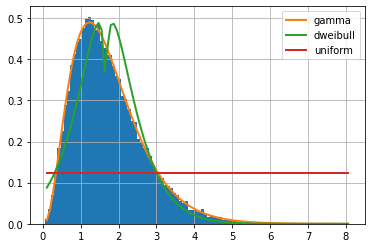

In [12]:
#!pip install fitter
from fitter import Fitter
f = Fitter(x_gamma, distributions=['gamma', 'dweibull', 'uniform'])
f.fit()
f.summary()